In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt
import os

Check if you installed the LePhare package.<br>
Website : http://www.cfht.hawaii.edu/~arnouts/LEPHARE/lephare.html

In [2]:
from pylephare import lephare

Check if the BC03 templates are well installed.

In [ ]:
lephare.BC03Installer.install(verbose=True)

# Data

Let's load an example of compatible input data: pylephare/data/data_test.csv<br>
The code expects input data in form of a dataframe with the following column format:

filtername1, filtername1.err, filtername2, filtername2.err, ..., filternameN, filternameN.err, CONTEXT, Z-SPEC, STRING

where filtername{} is a known filter by LePhare with the format instrument.band, for instance sdss.u or ps1.z.<br>
The 'CONTEXT' number defines which filter data will be used in the SED fitting. It is equal to the quadratic sum of the used filtername position numbers. For example, using the filters = ["sdss.u", "sdss.g", "sdss.r", "sdss.i", "sdss.z"] (thereby the position numbers are 0 for "sdss.u" until 4 for "sdss.z") :
- CONTEXT = 31 --> ["sdss.u", "sdss.g", "sdss.r", "sdss.i", "sdss.z"]
- CONTEXT = 30 --> ["sdss.g", "sdss.r", "sdss.i", "sdss.z"]
- CONTEXT = 15 --> ["sdss.u", "sdss.g", "sdss.r", "sdss.i"]
- CONTEXT = 25 --> ["sdss.u", "sdss.i", "sdss.z"]

The 'Z-SPEC' is the redshift.<br>
In 'STRING' contain all other informations given by the user, such as the SNeIa name in our example.

In [3]:
from pylephare import io

In [4]:
data = pandas.read_csv(io._PACKAGE_ROOT+"/data/data_test.csv", sep=" ")
data

,sdss.u,sdss.u.err,ps1.g,ps1.g.err,ps1.r,ps1.r.err,ps1.i,ps1.i.err,ps1.z,ps1.z.err,CONTEXT,Z-SPEC,STRING
0,1.227194e-17,4.928681e-18,1.389326e-17,6.902862e-20,8.659294e-18,2.922806e-20,9.346882e-18,4.667556e-20,3.230372e-18,2.169672e-20,31,0.03185,2007aj
1,3.189998e-17,4.026194e-18,7.381098e-17,1.799055e-19,7.192829e-17,9.228955e-20,8.032923e-17,1.650248e-19,6.790159e-17,9.719448e-20,31,0.03509,2002G
2,6.248074e-16,7.136033e-18,1.801086e-15,1.164064e-18,2.002177e-15,4.736618e-19,2.109367e-15,8.014284e-19,1.743491e-15,4.585604e-19,31,0.02824,ASASSN-15la


# Classic LePhare SED fitting

Let's make a python wrapper object of LePhare.

The class builder accept some inputs:
- a configuration file directory (if None is given, take the default one, included in the package),
- an output directory to save every results of the SED fitting (if None is given, create a folder, formated by the time and date, in the lephare package: "lephare/lepharework/pylephare/{}"),
- the unit used for input fluxes data (inhz = True if the flux unit is erg/s/cm2/Hz, False for erg/s/cm2/AA)

In [6]:
CONFIG_FILE = None
DIROUT = None #io.PATH_PYLEPHAREWORK+"/test_ztf_meeting/"

lp = lephare.LePhare(data=data, configfile=CONFIG_FILE, dirout=DIROUT, inhz=False)

running set_filter_suffix
calling set_zphotlib


/Users/mart1/anaconda3/lib/python3.7/site-packages/pylephare-0.2.2-py3.7.egg/pylephare/io.py:187: UserWarning: Default dirout used: /Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114
  warnings.warn("Default dirout used: %s"%self._dirout)


You can check the configuration parameters thanks to the following command.<br>
You can choose on the format of the output:
- "dict" return a dictionary,
- "dataframe" return a pandas.DataFrame,
- "array" return a numpy.array,
- "configfile" return a friendly visual identical to the given configuration file.

These configuration parameters have been adapted to the created instance. If you want to know what your original input configuration parameters are, you can get them with:
- "original" (return the original configuration file).

In [8]:
lp.config.get_config("dict")

{'STAR_SED': {'value': '$LEPHAREDIR/sed/STAR/STAR_MOD.list',
  'comments': 'STAR list (full path)'},
 'STAR_FSCALE': {'value': '3.432E-09', 'comments': 'Arbitrary Flux Scale'},
 'QSO_SED': {'value': '$LEPHAREDIR/sed/QSO/QSO_MOD.list',
  'comments': 'QSO list (full path)'},
 'QSO_FSCALE': {'value': '1', 'comments': 'Arbitrary Flux Scale'},
 'GAL_SED': {'value': '$LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_MOD.list',
  'comments': 'GAL list (full path)'},
 'GAL_FSCALE': {'value': '1.', 'comments': 'Arbitrary Flux Scale'},
 'GAL_LIB': {'value': 'LIB_BC03_sdssu_ps1g_ps1r_ps1i_ps1z', 'comments': None},
 'SEL_AGE': {'value': '$LEPHAREDIR/sed/GAL/BC03_CHAB/BC03_AGE.list',
  'comments': 'Age list(full path)'},
 'AGE_RANGE': {'value': '0.,13.55e9', 'comments': 'Age Min-Max in yr'},
 'FILTER_LIST': {'value': 'sdss/up.pb,ps1/g_ps.pb,ps1/r_ps.pb,ps1/i_ps.pb,ps1/z_ps.pb',
  'comments': None},
 'TRANS_TYPE': {'value': '0', 'comments': 'TRANSMISSION TYPE'},
 'FILTER_CALIB': {'value': '0', 'comments': '0[-def]

You can change the configuration parameters directly from python.<br>
When the SED fitting is launched, the code will save the configuration file used during the process within the output directory.

In [7]:
lp.config.set_value(key="EM_LINES", value="NO")

In [8]:
lp.config.get_value(key="EM_LINES")

'NO'

In [9]:
lp.config.set_value(key="EM_LINES", value="YES")

You can check if the data are now in a LePhare compatible format, regarding the columns and the flux unit (erg/cm2/s/Hz).

In [9]:
lp.data

,sdss.u,sdss.u.err,ps1.g,ps1.g.err,ps1.r,ps1.r.err,ps1.i,ps1.i.err,ps1.z,ps1.z.err,CONTEXT,Z-SPEC,STRING
0,5.193125e-29,2.085673e-29,1.097513e-28,5.452987e-31,1.115556e-28,3.765381e-31,1.774660e-28,8.862126e-31,8.117420e-29,5.452048e-31,31,0.03185,2007aj
1,1.349914e-28,1.703768e-29,5.830774e-28,1.421182e-30,9.266348e-28,1.188944e-30,1.525183e-27,3.133268e-30,1.706261e-27,2.442346e-30,31,0.03509,2002G
2,2.644002e-27,3.019760e-29,1.422786e-26,9.195643e-30,2.579356e-26,6.102070e-30,4.004981e-26,1.521644e-29,4.381120e-26,1.152291e-29,31,0.02824,ASASSN-15la


### Run the fit

It will take time for the first time you execute it, as it has to create the template files...<br>
But then, if you relaunch it, will be fast (unless 'update_init' attribute is True).<br>

There are a few options accepted:
- 'filters': allow the user to choose which ones of the available filters in the input data to use for the SED fitting (basically changing the 'CONTEXT' value). It is associated to the parameter 'contextid'. Default is None, meaning that every filters in the input data are used.
- 'contextid': if 'filters' (else than None) is given, allow the user to choose on which row(s) of the input data to change the 'CONTEXT'. Default is None, meaning that every rows will be changed.
- 'dirout': allow the user to change the output directory. Default is None, meaning that it is not changed.
- 'configfile': allow the user to change the configuration file, and so the whole configuration parameters. Default is None, meaning that it is not changed.
- 'catinfile': if 'configfile' is given (else than None), allow the user to change the input data with a file directory. Default is None, meaning that it is not changed.
- 'onwhat': let the user choose on which of the three LePhare available template kinds to run the fit. Default is the use of the three ones ["star","qso","gal"].
- 'gallib': choice of the library used for galaxy templates. Default is "BC03".
- 'update_init': execute the SED fitting initialization, even if the templates already exist. Default is False.

It returns a dictionary including every result directories.

In [11]:
lp_out = lp.run()
lp_out

gal:  True star:  True qso:  True ; gallib:  BC03
calling set_zphotlib
filter_file:  sdssu_ps1g_ps1r_ps1i_ps1z.filt
configfile: /Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/config
['Id000000002.spec', 'Id000000000.spec', 'Id000000001.spec']
moved to
['/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000002.spec', '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000000.spec', '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000001.spec']


{'config': '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/config',
 'catin': '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/data.csv',
 'catout': '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/catout',
 'spec': ['/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000002.spec',
  '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000000.spec',
  '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000001.spec']}

The output catalog can be read and returned as a pandas.DataFrame.

In [12]:
lephare.read_catout(lp_out["catout"], ["sdss.u", "ps1.g", "ps1.r", "ps1.i", "ps1.z"])

,Z_BEST,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,DIST_MOD_BEST,NBAND_USED,Z_SEC,CHI_SEC,MOD_SEC,...,MASS_MED,MASS_SUP,SFR_BEST,SFR_INF,SFR_MED,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_MED,SSFR_SUP
IDENT,,,,,,,,,,,,,,,,,,,,,
0,0.0319,0.562617E+03,1,1,0.060,0.357280E+02,5,-99.0000,0.100000E+10,-999,...,-0.990000E+02,-0.990000E+02,-0.168204E+01,-0.990000E+02,-0.990000E+02,-0.990000E+02,-0.813408E+01,-0.990000E+02,-0.990000E+02,-0.990000E+02
1,0.0351,0.408383E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885715E+01,0.894030E+01,-0.138686E+01,-0.161987E+01,-0.145641E+01,-0.131668E+01,-0.103165E+02,-0.104625E+02,-0.102953E+02,-0.101667E+02
2,0.0282,0.235110E+02,5,1,0.140,0.354610E+02,5,-99.0000,0.100000E+10,-999,...,0.100913E+02,0.103689E+02,-0.565547E+01,-0.558761E+01,-0.266039E+01,-0.154987E+01,-0.155804E+02,-0.164447E+02,-0.155375E+02,-0.117170E+02


Finally, you can plot the fitted spectra. Let's show the second entry spectrum.

In [12]:
from pylephare import spectrum

In [13]:
lp_out

{'config': '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/config',
 'catin': '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/data.csv',
 'catout': '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/catout',
 'spec': ['/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000002.spec',
  '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000000.spec',
  '/Users/mart1/Desktop/Libraries/lephare/lepharework/pylephare/29042020_142114/Id000000001.spec']}

In [14]:
lp_spec = spectrum.LePhareSpectrum(filename=lp_out["spec"][2], lbda_range=[1000, 10000])

<IPython.core.display.Javascript object>


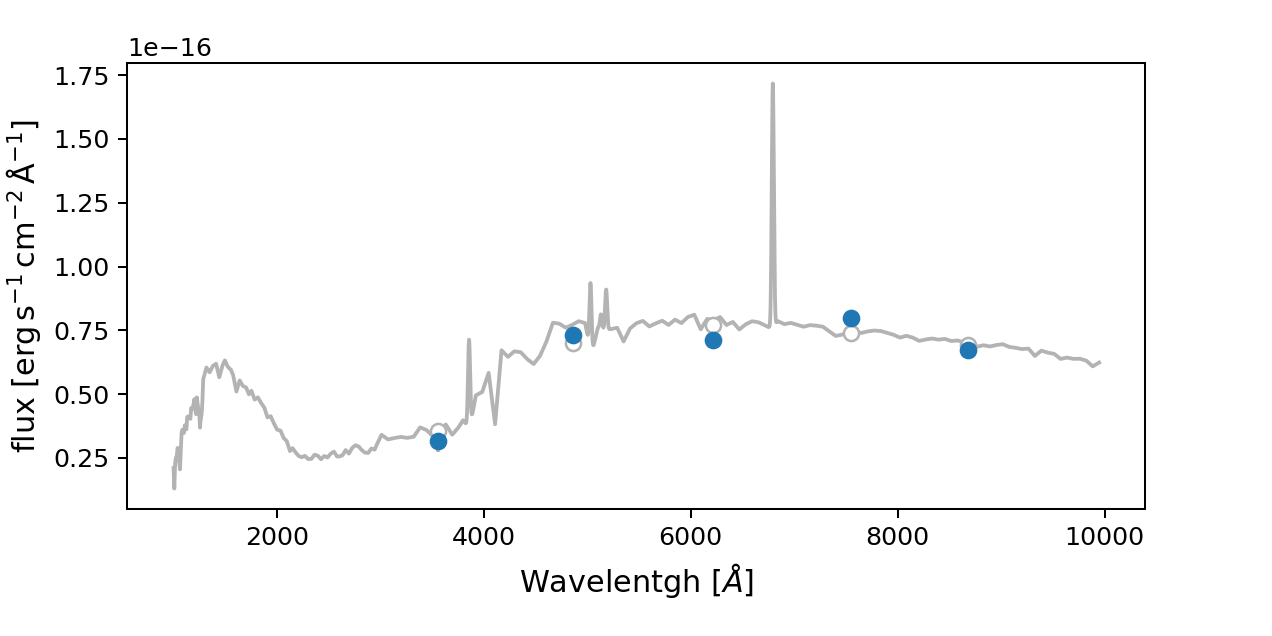

In [15]:
_ = lp_spec.show()

# Monte Carlo fit

With this LePhare python wrapper, a Monte Carlo fit is implemented to better account for mesurement errors when deriving the SED fitted parameters by lephare.<br>
But on the contrary of classic LePhare, this SED fitting procedure only takes one data row by one (instead of as many as you want).

Let's take the second row of the test data as an example.

In [13]:
from pylephare import montecarlo

In [14]:
data_mc = data.iloc[1]
data_mc

sdss.u           3.19e-17
sdss.u.err    4.02619e-18
ps1.g          7.3811e-17
ps1.g.err     1.79905e-19
ps1.r         7.19283e-17
ps1.r.err     9.22895e-20
ps1.i         8.03292e-17
ps1.i.err     1.65025e-19
ps1.z         6.79016e-17
ps1.z.err     9.71945e-20
CONTEXT                31
Z-SPEC            0.03509
STRING              2002G
Name: 1, dtype: object

The MC builder accepts data in pandas.Series type and a number of draws.<br>
The draws are considered as random values given by a normal PDF centered on flux values and scaled by the measurement uncertainties.

In [15]:
NDRAW = 50

mclp = montecarlo.MCLePhare(data_mc, NDRAW)

You can check on the MC draws. The first row (index=0) is the original measurement.

In [16]:
mclp.mcdata

,sdss.u,sdss.u.err,ps1.g,ps1.g.err,ps1.r,ps1.r.err,ps1.i,ps1.i.err,ps1.z,ps1.z.err,CONTEXT,Z-SPEC,STRING
0,3.189998e-17,4.026194e-18,7.381098e-17,1.799055e-19,7.192829e-17,9.228955e-20,8.032923e-17,1.650248e-19,6.790159e-17,9.719448e-20,31,0.03509,2002G
1,3.821825e-17,4.026194e-18,7.388921e-17,1.799055e-19,7.196432e-17,9.228955e-20,8.060813e-17,1.650248e-19,6.782458e-17,9.719448e-20,31,0.03509,2002G
2,3.761375e-17,4.026194e-18,7.367693e-17,1.799055e-19,7.183012e-17,9.228955e-20,8.043318e-17,1.650248e-19,6.790561e-17,9.719448e-20,31,0.03509,2002G
3,3.024038e-17,4.026194e-18,7.367562e-17,1.799055e-19,7.195305e-17,9.228955e-20,8.016667e-17,1.650248e-19,6.796926e-17,9.719448e-20,31,0.03509,2002G
4,3.087343e-17,4.026194e-18,7.366823e-17,1.799055e-19,7.194654e-17,9.228955e-20,8.027785e-17,1.650248e-19,6.803066e-17,9.719448e-20,31,0.03509,2002G
5,3.328552e-17,4.026194e-18,7.372520e-17,1.799055e-19,7.194480e-17,9.228955e-20,8.016536e-17,1.650248e-19,6.774202e-17,9.719448e-20,31,0.03509,2002G
6,2.925856e-17,4.026194e-18,7.369649e-17,1.799055e-19,7.192581e-17,9.228955e-20,8.052860e-17,1.650248e-19,6.791842e-17,9.719448e-20,31,0.03509,2002G
7,2.795972e-17,4.026194e-18,7.390305e-17,1.799055e-19,7.204070e-17,9.228955e-20,8.024232e-17,1.650248e-19,6.787251e-17,9.719448e-20,31,0.03509,2002G
8,2.635469e-17,4.026194e-18,7.418702e-17,1.799055e-19,7.196271e-17,9.228955e-20,8.028444e-17,1.650248e-19,6.796309e-17,9.719448e-20,31,0.03509,2002G
9,3.714937e-17,4.026194e-18,7.409745e-17,1.799055e-19,7.183945e-17,9.228955e-20,8.026333e-17,1.650248e-19,6.791120e-17,9.719448e-20,31,0.03509,2002G


Those data will be implemented in LePhare and fitted as in the classic method (see above).<br>
Let's choose the output directory instead of the default one.

In [17]:
CONFIG_FILE = None
DIROUT = io.PATH_PYLEPHAREWORK+"/tutorial/"

mclp.load_lephare(configfile=CONFIG_FILE, dirout=DIROUT)

running set_filter_suffix
calling set_zphotlib


/Users/mart1/anaconda3/lib/python3.7/site-packages/pylephare-0.2.2-py3.7.egg/pylephare/configparser.py:18: UserWarning: using default config file
  warnings.warn("using default config file")


Let's run the SED fitting. It takes the same input parameters as for the classic LePhare (see above).<br>
The only difference is that it doesn't return anything, but save the result directories as an attributes of the object.

In [18]:
mclp.run(update_init=False, verbose=False)

calling set_zphotlib


You can look at the photometric results. The show() method let choose if you want to plot the spectra (as many as you want in limit of the number of draws) or not. It returns the figure and the axes in a dictionary

<IPython.core.display.Javascript object>


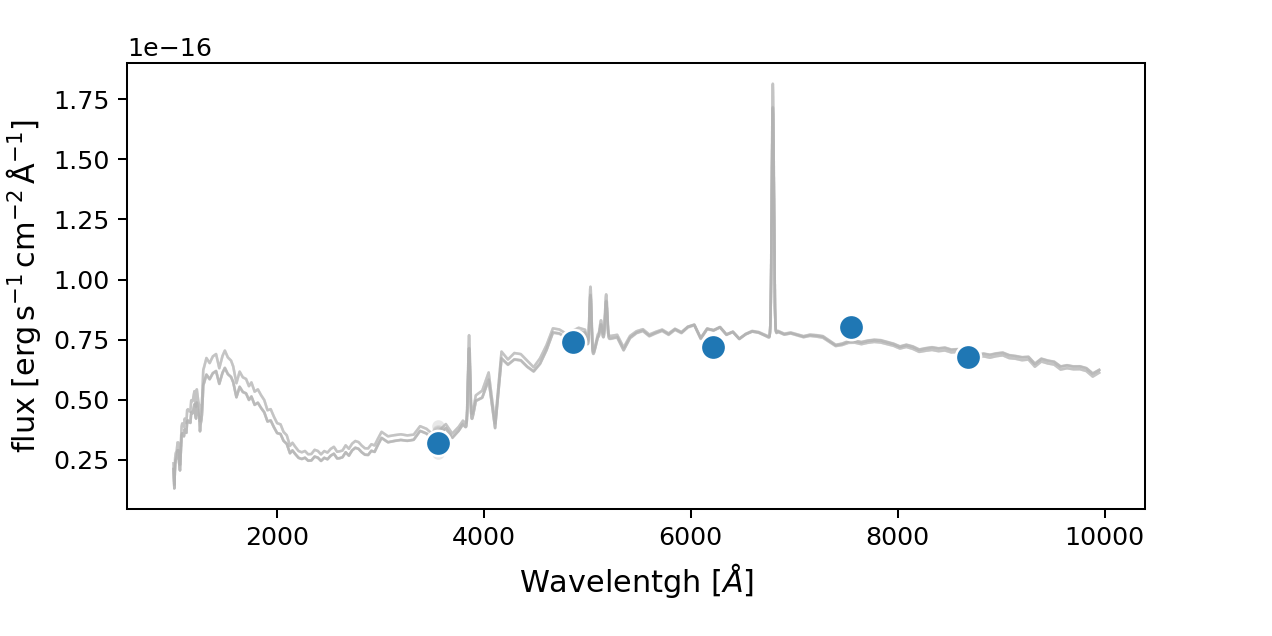

{'fig': <Figure size 700x350 with 1 Axes>,
 'ax': <matplotlib.axes._axes.Axes at 0x1a1c064150>}

In [25]:
mclp.show(add_spec=True, nmc=10)

Finally, you can find the output catalog as an object attribute, returned as a pandas.DataFrame.

In [20]:
mclp.catout

loading results...


,Z_BEST,CHI_BEST,MOD_BEST,EXTLAW_BEST,EBV_BEST,DIST_MOD_BEST,NBAND_USED,Z_SEC,CHI_SEC,MOD_SEC,...,MASS_MED,MASS_SUP,SFR_BEST,SFR_INF,SFR_MED,SFR_SUP,SSFR_BEST,SSFR_INF,SSFR_MED,SSFR_SUP
IDENT,,,,,,,,,,,,,,,,,,,,,
0,0.0351,0.408383E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885715E+01,0.894030E+01,-0.138686E+01,-0.161987E+01,-0.145641E+01,-0.131668E+01,-0.103165E+02,-0.104625E+02,-0.102953E+02,-0.101667E+02
1,0.0351,0.405030E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885890E+01,0.894036E+01,-0.133922E+01,-0.154582E+01,-0.139025E+01,-0.123904E+01,-0.102213E+02,-0.103787E+02,-0.102346E+02,-0.101011E+02
2,0.0351,0.401831E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.886148E+01,0.894267E+01,-0.134005E+01,-0.155095E+01,-0.139627E+01,-0.124570E+01,-0.102213E+02,-0.103854E+02,-0.102432E+02,-0.101087E+02
3,0.0351,0.404320E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885747E+01,0.894019E+01,-0.138730E+01,-0.165477E+01,-0.147492E+01,-0.133222E+01,-0.103165E+02,-0.104896E+02,-0.103177E+02,-0.101938E+02
4,0.0351,0.404826E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885953E+01,0.894263E+01,-0.138707E+01,-0.164208E+01,-0.146822E+01,-0.132656E+01,-0.103165E+02,-0.104817E+02,-0.103124E+02,-0.101876E+02
5,0.0351,0.392604E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885589E+01,0.893811E+01,-0.138719E+01,-0.159918E+01,-0.144430E+01,-0.130590E+01,-0.103165E+02,-0.104433E+02,-0.102817E+02,-0.101494E+02
6,0.0351,0.432366E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885838E+01,0.894234E+01,-0.138701E+01,-0.167324E+01,-0.148780E+01,-0.134371E+01,-0.103165E+02,-0.105078E+02,-0.103338E+02,-0.102079E+02
7,0.0351,0.429536E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.885120E+01,0.893773E+01,-0.138697E+01,-0.169778E+01,-0.150221E+01,-0.135303E+01,-0.103165E+02,-0.105300E+02,-0.103407E+02,-0.102103E+02
8,0.0351,0.463068E+02,10,1,0.200,0.359436E+02,5,-99.0000,0.100000E+10,-999,...,0.884569E+01,0.893516E+01,-0.138673E+01,-0.172769E+01,-0.151730E+01,-0.136351E+01,-0.103165E+02,-0.105504E+02,-0.103508E+02,-0.102156E+02


# K-corrections

Once the SED fitting, associated with MC drawing, is done, we can basically shift the spectra to redshift z = 0. It will give you k-corrected photometric measurements.

First, let's load the previous MC example results (be sure to have run it).

In [21]:
from pylephare import montecarlo

In [22]:
DIRIN = io.PATH_PYLEPHAREWORK+"/tutorial/"

mclp_kcorr = montecarlo.MCLePhare.load_fromdir(DIRIN)

loading results...


The fitted photometry is measured on every spectra thanks to the python package sncosmo. It allows you to measure whatever filter you want, even if it is not part of the fitted photometric data.<br>
In order to get k-corrected photometry, the spectra are shifted to redshift z = 0 (restframe=True).<br>
It allows you to choose in which unit to return the photometry (mag, erg/s/cm2/Hz, erg/s/cm2/AA).

In [23]:
u_kcorr = mclp_kcorr.spectra.get_synthetic_photometry(filter_="sdss.r", restframe=True, influx=False)
u_kcorr

[(5975.513701201668, 18.838748376040623),
 (5975.513701201668, 18.83867899081115),
 (5975.513701201668, 18.841219780982634),
 (5975.513701201668, 18.840464990811157),
 (5975.513701201668, 18.83921718360596),
 (5975.513701201668, 18.839057390720026),
 (5975.513701201668, 18.840058372485718),
 (5975.513701201668, 18.840797519456572),
 (5975.513701201668, 18.840750287524543),
 (5975.513701201668, 18.838330607772253),
 (5975.513701201668, 18.84010159857616),
 (5975.513701201668, 18.837286685875124),
 (5975.513701201668, 18.841509974307755),
 (5975.513701201668, 18.839573484436784),
 (5975.513701201668, 18.838762838943037),
 (5975.513701201668, 18.840755285710756),
 (5975.513701201668, 18.84018583894304),
 (5975.513701201668, 18.840411292354243),
 (5975.513701201668, 18.84093628571076),
 (5975.513701201668, 18.83933328752454),
 (5975.513701201668, 18.83966529235424),
 (5975.513701201668, 18.843626478898553),
 (5975.513701201668, 18.839772780982635),
 (5975.513701201668, 18.83809018095543),


<IPython.core.display.Javascript object>


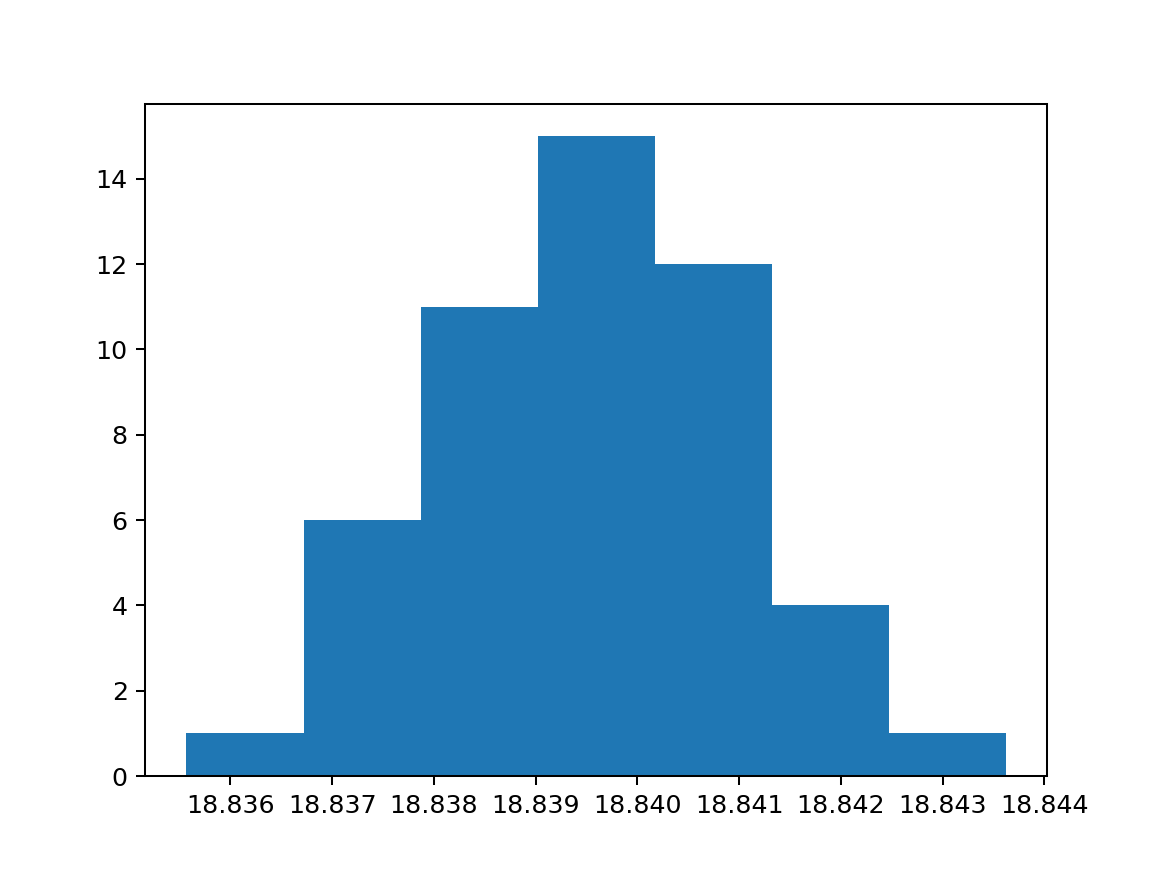

(array([ 1.,  6., 11., 15., 12.,  4.,  1.]),
 array([18.83556697, 18.83671833, 18.83786969, 18.83902104, 18.8401724 ,
        18.84132376, 18.84247512, 18.84362648]),
 <a list of 7 Patch objects>)

In [24]:
fig, ax = plt.subplots()
ax.hist(np.array(u_kcorr).T[1], bins="auto")